In [1]:
%load_ext autoreload
%autoreload 2

# Weak Supervision VAE

Implementing some version of [Weak Supervision Variational Auto-Encoder](https://openreview.net/forum?id=0oDzoRjrbj) by Tonolini et al. 

There are some differences with the paper especially around the decoders and its still a work-in-progress as its mainly tested around the census data at the moment.

In [ ]:
import os
import sys

os.chdir("../..")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import torch

import flippers
from examples.utils import load_wrench_dataset, MetricsUtil
from examples.Experiments._vae import WeakLabelVAE

M = {}

c:\Users\liamt\Repos\flippers\flippers\_core\_core.py:151: UserWarning: Polarity mapping if not furnished.
Make sure L captures all possible values of each weak labelers.
  warnings.warn(
Epoch [2/2]: 100%|██████████| 2/2 [00:02<00:00,  1.39s/it, Loss=-9.6]


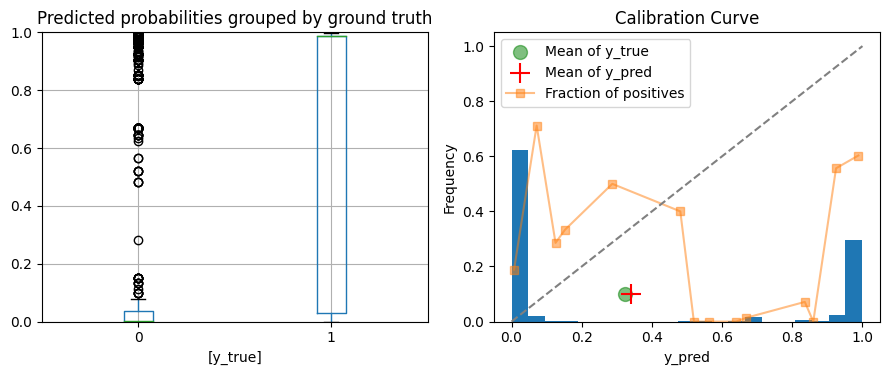

c:\Users\liamt\Repos\flippers\flippers\_core\_core.py:151: UserWarning: Polarity mapping if not furnished.
Make sure L captures all possible values of each weak labelers.
  warnings.warn(
Epoch [1/1]: 100%|██████████| 1/1 [00:04<00:00,  4.63s/it, Loss=-4.4]


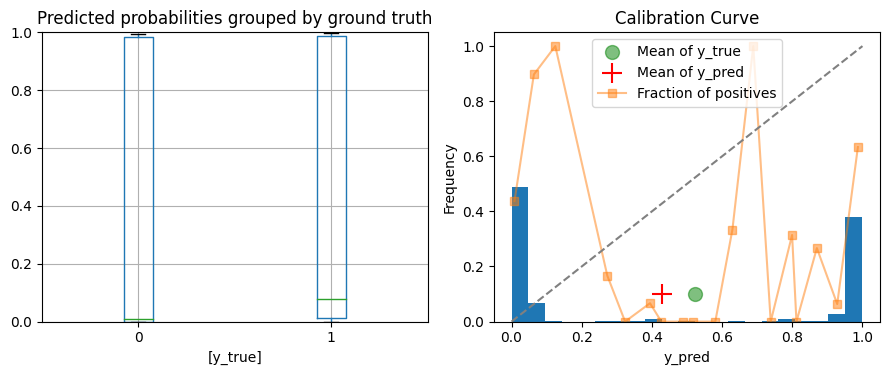

c:\Users\liamt\Repos\flippers\flippers\_core\_core.py:151: UserWarning: Polarity mapping if not furnished.
Make sure L captures all possible values of each weak labelers.
  warnings.warn(
Epoch [11/11]: 100%|██████████| 11/11 [00:02<00:00,  4.14it/s, Loss=-6.0]


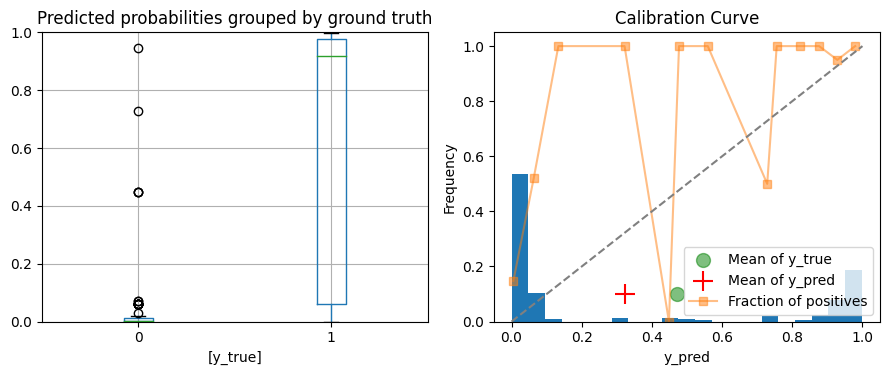

c:\Users\liamt\Repos\flippers\flippers\_core\_core.py:151: UserWarning: Polarity mapping if not furnished.
Make sure L captures all possible values of each weak labelers.
  warnings.warn(
Epoch [2/2]: 100%|██████████| 2/2 [00:03<00:00,  1.80s/it, Loss=-10.6]


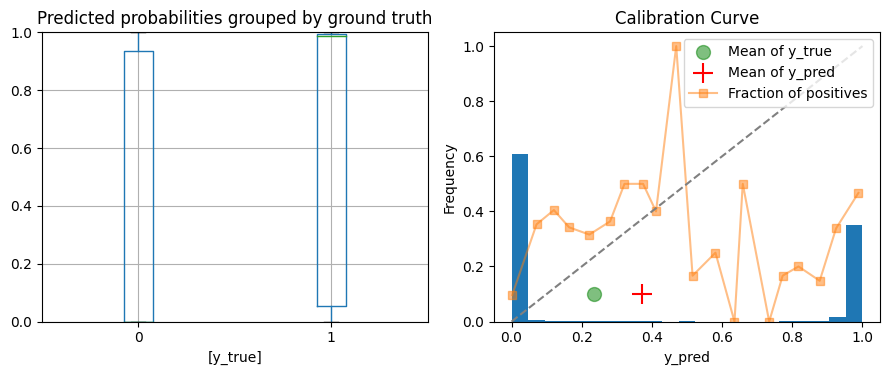

c:\Users\liamt\Repos\flippers\flippers\_core\_core.py:151: UserWarning: Polarity mapping if not furnished.
Make sure L captures all possible values of each weak labelers.
  warnings.warn(
Epoch [1/1]: 100%|██████████| 1/1 [00:03<00:00,  3.74s/it, Loss=4.6]


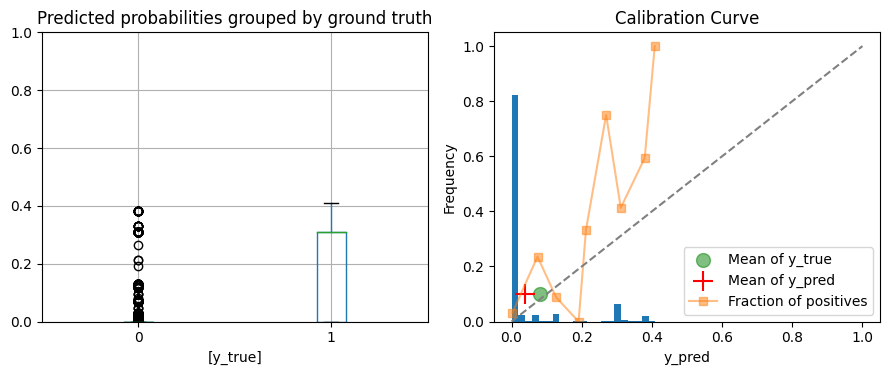

c:\Users\liamt\Repos\flippers\flippers\_core\_core.py:151: UserWarning: Polarity mapping if not furnished.
Make sure L captures all possible values of each weak labelers.
  warnings.warn(
Epoch [1/1]: 100%|██████████| 1/1 [00:02<00:00,  2.79s/it, Loss=13.4]


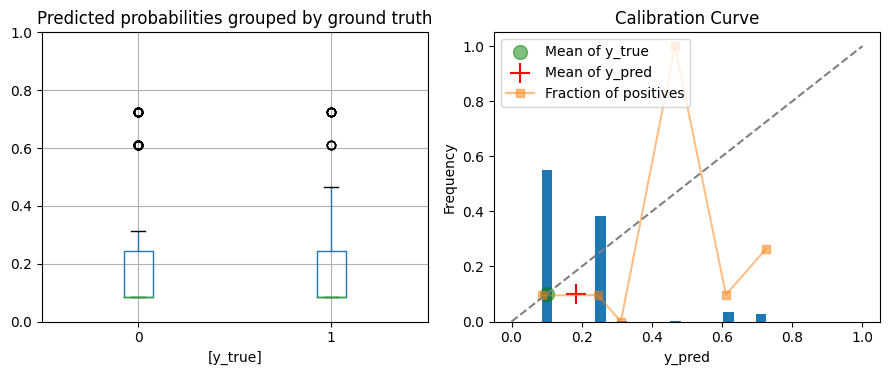

c:\Users\liamt\Repos\flippers\flippers\_core\_core.py:151: UserWarning: Polarity mapping if not furnished.
Make sure L captures all possible values of each weak labelers.
  warnings.warn(
Epoch [4/4]: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s, Loss=-0.8]


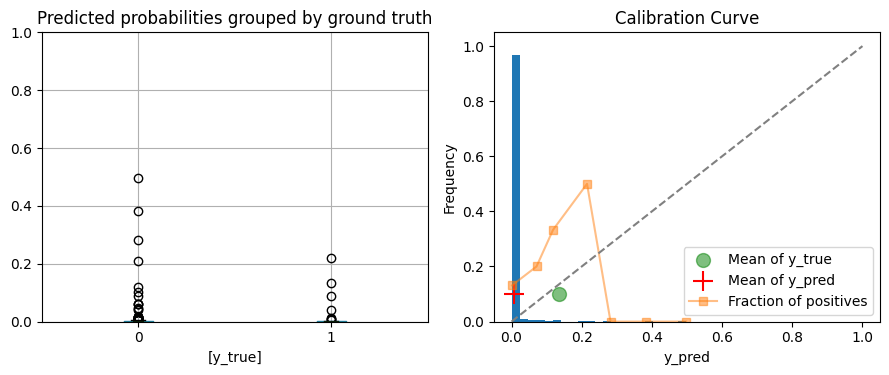

c:\Users\liamt\Repos\flippers\flippers\_core\_core.py:151: UserWarning: Polarity mapping if not furnished.
Make sure L captures all possible values of each weak labelers.
  warnings.warn(
Epoch [3/3]: 100%|██████████| 3/3 [00:03<00:00,  1.05s/it, Loss=-11.9]


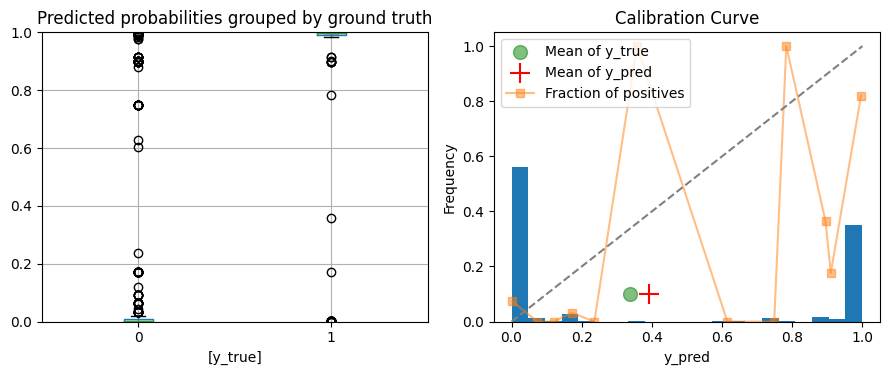

In [5]:
datasets = ["cdr", "yelp", "youtube", "census", "spouse", "basketball", "sms", "tennis"]
for dataset in datasets:
    data, weak_labels, polarities = load_wrench_dataset(dataset)
    train, dev, test = data
    L_train, L_dev, L_test = weak_labels
    class_balances = list(
        dev["label"].astype(int).value_counts(normalize=True).sort_index()
    )
    y_test = test["label"].astype(int).values
    Metrics = MetricsUtil(y_test, L_test)

    m = WeakLabelVAE(polarities=polarities, class_balances=class_balances)
    m.fit(L_train)
    M[dataset] = Metrics.score(m, name="WeakLabelVAE")

In [6]:
M

{'cdr': {'F1': 0.578,
  'Average_Precision': 0.612,
  'AUC': 0.797,
  'Accuracy': 0.717,
  'Balanced_Accuracy': 0.686},
 'yelp': {'F1': 0.522,
  'Average_Precision': 0.665,
  'AUC': 0.637,
  'Accuracy': 0.547,
  'Balanced_Accuracy': 0.55},
 'youtube': {'F1': 0.788,
  'Average_Precision': 0.907,
  'AUC': 0.871,
  'Accuracy': 0.832,
  'Balanced_Accuracy': 0.823},
 'census': {'F1': 0.562,
  'Average_Precision': 0.48,
  'AUC': 0.788,
  'Accuracy': 0.732,
  'Balanced_Accuracy': 0.73},
 'spouse': {'F1': 0.0,
  'Average_Precision': 0.369,
  'AUC': 0.8,
  'Accuracy': 0.919,
  'Balanced_Accuracy': 0.5},
 'basketball': {'F1': 0.131,
  'Average_Precision': 0.118,
  'AUC': 0.529,
  'Accuracy': 0.859,
  'Balanced_Accuracy': 0.525},
 'sms': {'F1': 0.0,
  'Average_Precision': 0.146,
  'AUC': 0.501,
  'Accuracy': 0.866,
  'Balanced_Accuracy': 0.5},
 'tennis': {'F1': 0.806,
  'Average_Precision': 0.787,
  'AUC': 0.884,
  'Accuracy': 0.859,
  'Balanced_Accuracy': 0.862}}

In [7]:
df = pd.DataFrame(M)

dataset_to_metric = {
    "imdb": "Accuracy",
    "yelp": "Accuracy",
    "youtube": "Accuracy",
    "sms": "F1",
    "agnews": "Accuracy",
    "trec": "Accuracy",
    "spouse": "F1",
    "cdr": "F1",
    "semeval": "Accuracy",
    "chemprot": "Accuracy",
    "commercial": "F1",
    "tennis": "F1",
    "basketball": "F1",
    "census": "F1",
}


# Formatting function to underline entries
def underline_entries(x):
    is_metric = x.index == dataset_to_metric[x.name]
    return ["text-decoration: underline" if v else "" for v in is_metric]


# Underlines the metrics used in the wrench benchmark
df.style.apply(underline_entries).format("{:.3f}")

,cdr,yelp,youtube,census,spouse,basketball,sms,tennis
F1,0.578,0.522,0.788,0.562,0.000,0.131,0.000,0.806
Average_Precision,0.612,0.665,0.907,0.480,0.369,0.118,0.146,0.787
AUC,0.797,0.637,0.871,0.788,0.800,0.529,0.501,0.884
Accuracy,0.717,0.547,0.832,0.732,0.919,0.859,0.866,0.859
Balanced_Accuracy,0.686,0.550,0.823,0.730,0.500,0.525,0.500,0.862
